# I- Observational studies

In [225]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('lalonde.csv', index_col='id')
df_control = df[df.treat==0]
df_treated = df[df.treat==1]
df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In our analysis, we assume that a person who is neither hispanic nor black is white. Therefore, we can add a column `white` that equals `(not black and not hispanic)`.

In [226]:
# Add the white column
df['white'] = 0
df.loc[(df.black == 0) & 
       (df.hispan == 0), 'white'] = 1
df = df[['treat','age','educ','black','hispan','white','married','nodegree','re74','re75','re78']]
df.head()

,treat,age,educ,black,hispan,white,married,nodegree,re74,re75,re78
id,,,,,,,,,,,
NSW1,1,37,11,1,0,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,0,1,0.0,0.0,289.7899


In [227]:
def convert_ax_money(ax):
    '''Helper function to format money values'''
    new_ticks = ['{}K'.format(int(a/1000)) for a in ax.get_xticks()]
    ax.set_xticklabels(new_ticks)

def boxplot_graph(serie1, serie2, 
                  label1='Control', label2='Treated',
                  xlabel='', ylabel='', title='', 
                  type_='money', ax=None):
    '''Helper function to help plot box plot'''
    df = pd.DataFrame({label1: serie1, label2: serie2})
    ax = sns.boxplot(data=df,orient="h", ax=ax)
    if type_ == 'money':
        new_ticks = ['{}K'.format(int(a/1000)) for a in ax.get_xticks()]
        ax.set_xticklabels(new_ticks)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    return ax

def distribution_graph(serie1, serie2, bins, 
                       label1='Control', label2='Treated',
                       xlabel='', ylabel='', title='', 
                       rotate=None, interval='normal', grid=True,
                       ax=None, proportion=True):
    '''Helper to plot distribution graphs'''
    y1, x1 = np.histogram(serie1, bins=bins)
    y2, x2 = np.histogram(serie2, bins=bins)
    if proportion:
        y1, y2 = y1/y1.sum(), y2/y2.sum()
    
    df = pd.DataFrame(data={ label1: y1, label2: y2}, index=bins[:-1])
#     if interval=='bool':
#         df = df.loc[1, :]
    if(ax is None):
        ax = df.plot(kind='bar')
    else:
        df.plot(kind='bar',ax=ax)
    ax.set_xlabel(xlabel)    
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    rotate = 0 if rotate is None else rotate
    bins = list(bins)
    bins += [bins[-1]+(bins[1]-bins[0])]
    if interval == 'money':
        new_ticks = [('Unemployed' if(bins[i] == 0) else '[{}K - {}K)'.format(int(bins[i]//1000), int(bins[i+1]//1000))) for i in range(len(bins)-1)]
        ax.set_xticklabels(new_ticks)
    elif interval == 'normal':
        new_ticks = ['[{} - {})'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)]
        ax.set_xticklabels(new_ticks)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate)
    if grid:
        ax.grid()
    return ax

## 1 - Naive Analysis

**Assumption:** Throughout our analysis, we assume that people generating 0 revenue are unemployed.

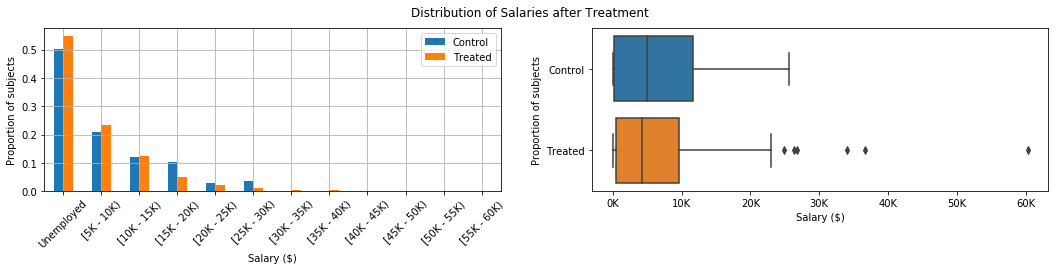

In [228]:

f,ax = plt.subplots(1, 2, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

# Plot the boxplot/distribution of the revenue (re78)
bins = np.arange(0, df['re78'].max(), 5e3)
distribution_graph(df[df.treat==0]['re78'], df[df.treat==1]['re78'], bins,
                       xlabel='Salary ($)', ylabel='Proportion of subjects', 
                       interval='money', rotate=45, ax=ax[0])

f.suptitle('Distribution of Salaries after Treatment')
boxplot_graph(df[df.treat==0]['re78'], df[df.treat==1]['re78'],
              xlabel='Salary ($)', ylabel='Proportion of subjects', 
              type_='money', ax = ax[1])

From a superficial analysis, one may conclude that the treatment correlates with a decrese in the salary since the distribution of `re78` contains higher number of **high salaries** in the control group compared to the treated group.

## 2 - A closer look at the data

age            educ            re74            re75        
      Control Treated Control Treated Control Treated Control Treated
count     429     185     429     185     429     185     429     185
mean       28      25      10      10    5619    2095    2466    1532
std        10       7       2       2    6788    4886    3291    3219
min        16      17       0       4       0       0       0       0
25%        19      20       9       9       0       0       0       0
50%        25      25      11      11    2547       0    1086       0
75%        35      29      12      12    9277    1291    3881    1817
max        55      48      18      16   25862   35040   18347   25142

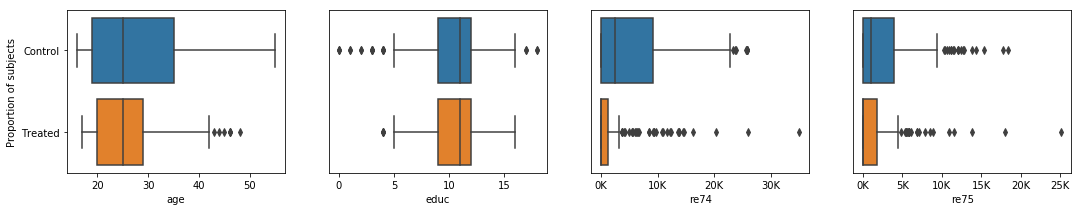

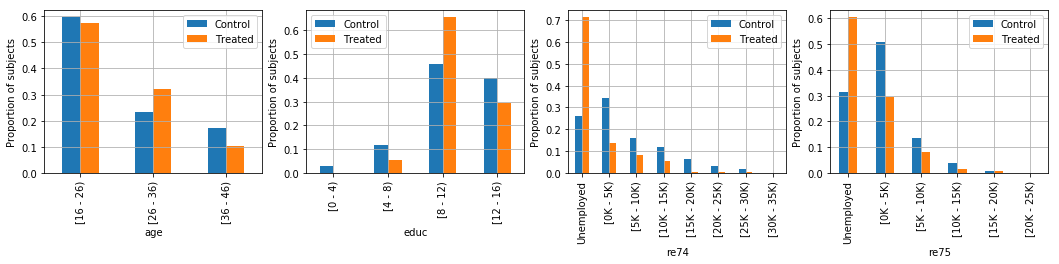

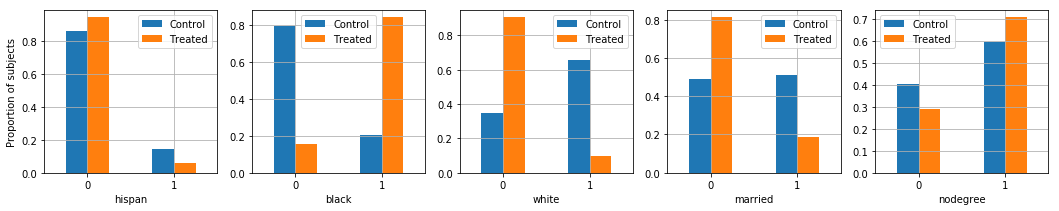

In [229]:
display(HTML('<h4><center>Distribution of variables in treated vs control group.</center></h4>'))

# Plot box plots first
numerical_description = []
f,ax = plt.subplots(1, 4, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
i = 0
for col in ['age','educ','re74','re75']:
    boxplot_graph(df[df.treat==0][col], df[df.treat==1][col],
              xlabel=col, ylabel='Proportion of subjects', 
              type_=('normal' if(col[:2] != 're') else 'money'), ax = ax[i])
    if i > 0:
        ax[i].set_yticks([])
        ax[i].set_ylabel('')
    describe_table = pd.concat([df[df.treat==0][col].describe(), df[df.treat==1][col].describe()], keys=['Control', 'Treated'], axis=1)
    numerical_description.append(describe_table)
    i += 1
display(pd.concat(numerical_description, keys=['age','educ','re74','re75'], axis=1).astype(int))

# Plot bar plots to see the difference is sub classes
f,ax = plt.subplots(1, 4, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
i = 0
for col, step in [('age', 10), ('educ', 4), ('re74', 5e3), ('re75', 5e3)]:
    bins = list(np.arange(df[col].min(), df[col].max()+1, step))
    if col[:2] == 're':
        bins = [0,1]+bins[1:]
    distribution_graph(df[df.treat==0][col], df[df.treat==1][col], bins,
                       xlabel=col, ylabel='Proportion of subjects', rotate=90, 
                       interval=('normal' if(col[:2] != 're') else 'money'),
                       ax=ax[i])
    i += 1

# Draw the distribution of the varaibles within different groups
f,ax = plt.subplots(1, 5, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
i=0
for col in ['hispan','black', 'white', 'married', 'nodegree']:
    bins = [0, 1, 2]
    serie1 = df.loc[df.treat==0, col]
    serie2 = df.loc[df.treat==1, col]
    distribution_graph(serie1, serie2, bins,
                           xlabel=col, ylabel='Proportion of subjects', interval='bool',
                           ax=ax[i])
    if i > 0:
        ax[i].set_ylabel('')
    i += 1

## Insights:

**Observation:**
- 50% of people in the treatment group (92) are unemployed meanwhile only 25% of people (107) in control group are unemployed.
- The control group contains more white people than hispanic and black people. Meanwhile the treatment group contains more black people than hispanic and white people.
- Hispanic people constitute a small portion in both treatment and control group.
- There are more married in the control group than in the treatment group.
- The proportion of people with no degree is slightly higher in treated group.
- The size of the control group is 2 times higher than the size of the treament group.

**Interpretation:**
- Proportions of variables in treatment and control group are different for most of the variables. Only the `age` and `educ` variables show approximately similar proportion for their different values in both groups. Therefore the two samples are not representative of our population, which implies our previous conclusion is not correct.

## 3 - Propensity score

Model accuracy: 0.825732899023


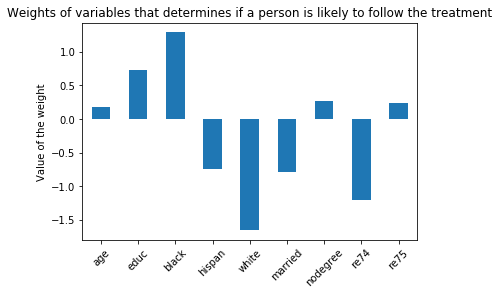

In [230]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

# Normalize the input values
X = df.loc[:,'age':'re75'].values
y = df['treat'].values
X = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

# Fit logistic regression to the data
logistic.fit(X,y)
df_proba = pd.DataFrame(logistic.predict_proba(X)[:,1], columns=["Propensity"])
df_proba.set_index(df.index, inplace=True)

# Plot the weights of the logistic regression
print('Model accuracy:', logistic.score(X, y))
ax = pd.Series(logistic.coef_[0]).plot(kind='bar')
ax.set_xticklabels(df.loc[:,'age':'re75'].reset_index(drop=True).columns, rotation=45)
ax.set_ylabel('Value of the weight')
ax.set_title('Weights of variables that determines if a person is likely to follow the treatment')
df_normalized = pd.DataFrame(index=df.index, columns=df.columns, data=df.values-df.values.min(axis=0))/(df.values.max(axis=0)-df.values.min(axis=0))

From the plot above, we notice that race variables like (`black`, `hispanic` and `white`) and the revenue of the person `re74` have a high impact in predicting if the person will follow the treatment or not.

## 4 - Matching the data points

In [231]:
import networkx as nx
from networkx import bipartite
# Create a new graph and add nodes
G = nx.Graph()
G.add_nodes_from(df_treated.index, bipartite=1)
G.add_nodes_from(df_control.index, bipartite=0)

# Full bipartite graph
for n1 in df_treated.index:
    for n2 in df_control.index:
        sc = -abs(df_proba.loc[n1, 'Propensity'] - df_proba.loc[n2,'Propensity'])
        G.add_edge(n1, n2, weights=sc )

In [232]:
matching = nx.max_weight_matching(G, maxcardinality=True)

In [233]:
# Extract the peoples in the control/treated group
# after matching
participants = []
control = []
for key, value in matching.items():
    if key[0] == 'N':
        treat, cont = key, value
    else:
        treat, cont = value, key
    if not cont in control:
        control.append(cont)
        participants.append(treat)

# Compute the difference of the propensities between matched peoples
df_match = pd.DataFrame(data={'Control':control, 'Treated':participants})
df_match['Difference'] = np.abs(df_proba.loc[control,'Propensity'].values - df_proba.loc[participants,'Propensity'].values)
display(HTML('<h4>Difference of propensities between matches</h4>'))
df_match.describe()

,Difference
count,185.000000
mean,0.393922
std,0.244038
min,0.000000
25%,0.132786
50%,0.473332
75%,0.608123
max,0.698319


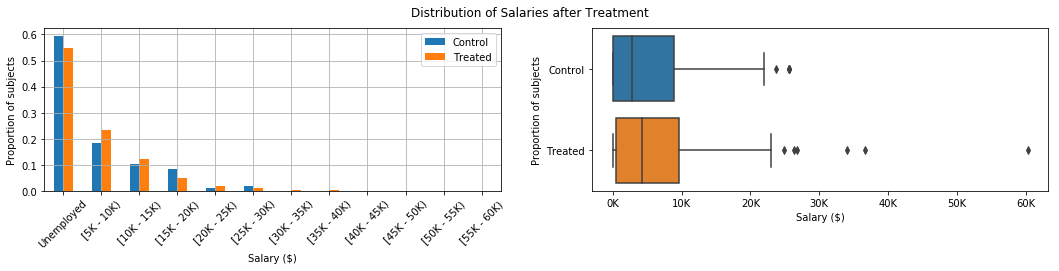

In [234]:
# Plot the distribution of the revenue re78 after the matching
f,ax = plt.subplots(1, 2, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

bins = np.arange(0, df['re78'].max(), 5e3)
distribution_graph(df.loc[control]['re78'], df.loc[participants]['re78'], bins,
                       xlabel='Salary ($)', ylabel='Proportion of subjects', 
                       interval='money', rotate=45, ax=ax[0])

f.suptitle('Distribution of Salaries after Treatment')
boxplot_graph(df.loc[control]['re78'], df.loc[participants]['re78'],
              xlabel='Salary ($)', ylabel='Proportion of subjects', 
              type_='money', ax = ax[1])

From the graph above, we notice that people who have received the treatment tend to have **a higher salary** than those who have not.

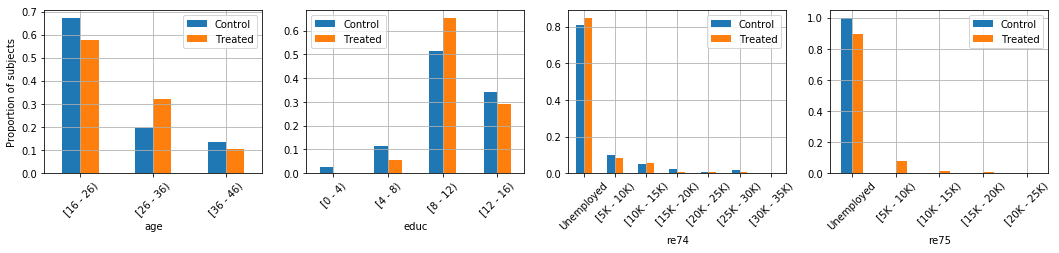

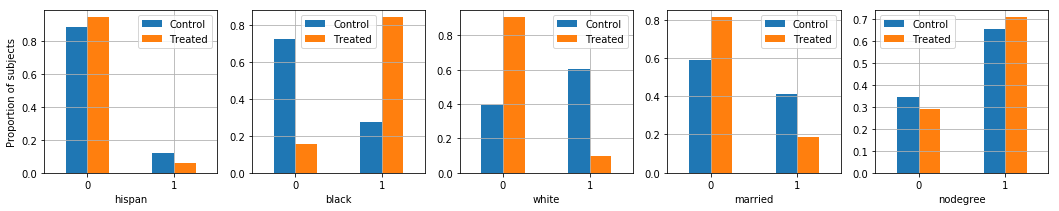

In [235]:
display(HTML('<h4><center>Distribution of variables in treated vs control group after matching.</center></h4>'))

# Plot the distribution of the variables in both treated and control group
f,ax = plt.subplots(1, 4, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
i = 0
for col, step in [('age', 10), ('educ', 4), ('re74', 5e3), ('re75', 5e3)]:
    bins = np.arange(df[col].min(), df[col].max()+1, step)
    distribution_graph(df.loc[control, col], df.loc[participants, col], bins,
                       xlabel=col, ylabel='Proportion of subjects', rotate=45, 
                       interval=('normal' if(col[:2] != 're') else 'money'),
                       ax=ax[i])
    if i > 0:
        ax[i].set_ylabel('')
    i += 1

f,ax = plt.subplots(1, 5, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
i = 0
for col in ['hispan','black', 'white', 'married', 'nodegree']:
    bins = [0, 1, 2]
    distribution_graph(df.loc[control, col], df.loc[participants, col], bins,
                       xlabel=col, ylabel='Proportion of subjects', interval='bool',
                       ax=ax[i])
    if i > 0:
        ax[i].set_ylabel('')
    i += 1

From analysing the proportion of variables, we see that a noticeable difference remains for some categorical variables like `black`, therefore our matching is still not perfect. Therefore, we still can not conclude that people who participated to the treatment receive higher salary than those in control group.

## 5- Balancing the groups further

From the graphs above, we observe that there is a considerable (highest) difference between the proportion of black people within the two groups. Therefore, we will match only subjects that have the same value for the `black` feature when building the bipartite graph.

In [236]:
import networkx as nx
from networkx import bipartite

# Create a new graph and add nodes
G = nx.Graph()
G.add_nodes_from(df_treated.index, bipartite=1)
G.add_nodes_from(df_control.index, bipartite=0)

# Full bipartite graph
for n1 in df_treated.index:
    for n2 in df_control.index:
        sc = -abs(df_proba.loc[n1, 'Propensity'] - df_proba.loc[n2,'Propensity'])
        if df.loc[n1, 'black'] == df.loc[n2, 'black']:
            G.add_edge(n1, n2, weights=sc)

# Match the bipartite group
matching = nx.max_weight_matching(G, maxcardinality=True)

# Extract the peoples in the control/treated group
# after matching
participants = []
control = []
for key, value in matching.items():
    if key[0] == 'N':
        treat, cont = key, value
    else:
        treat, cont = value, key
    if not cont in control:
        control.append(cont)
        participants.append(treat)

# Compute the difference between matched propensities
df_match = pd.DataFrame(data={'Control':control, 'Treated':participants})
df_match['Difference'] = np.abs(df_proba.loc[control,'Propensity'].values - df_proba.loc[participants,'Propensity'].values)
display(HTML('<h4>Difference of propensities between matches</h4>'))
display(df_match.describe())

,Difference
count,116.000000
mean,0.087787
std,0.090825
min,0.000422
25%,0.015074
50%,0.041991
75%,0.153355
max,0.334853


## 6- A less naive analysis

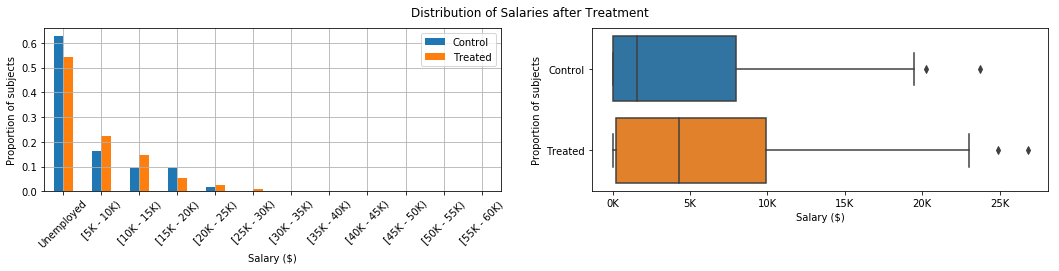

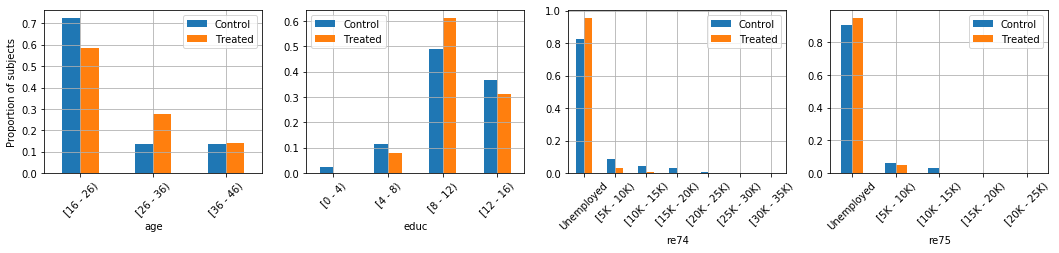

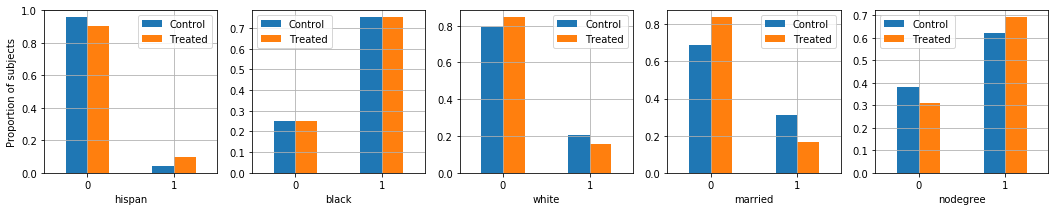

In [237]:
# Plot the distribution of the revenue re78 after the balanced matching
f,ax = plt.subplots(1, 2, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

bins = np.arange(0, df['re78'].max(), 5e3)
distribution_graph(df.loc[control]['re78'], df.loc[participants]['re78'], bins,
                       xlabel='Salary ($)', ylabel='Proportion of subjects', 
                       interval='money', rotate=45, ax=ax[0])
f.suptitle('Distribution of Salaries after Treatment')
boxplot_graph(df.loc[control]['re78'], df.loc[participants]['re78'],
              xlabel='Salary ($)', ylabel='Proportion of subjects', 
              type_='money', ax = ax[1])


display(HTML('<h4><center>Distribution of variables in treated vs control group after matching.</center></h4>'))

# Plot the distribution of the variables in both treated and control group
f,ax = plt.subplots(1, 4, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
i = 0
for col, step in [('age', 10), ('educ', 4), ('re74', 5e3), ('re75', 5e3)]:
    bins = np.arange(df[col].min(), df[col].max()+1, step)
    distribution_graph(df.loc[control, col], df.loc[participants, col], bins,
                       xlabel=col, ylabel='Proportion of subjects', rotate=45, 
                       interval=('normal' if(col[:2] != 're') else 'money'),
                       ax=ax[i])
    if i > 0:
        ax[i].set_ylabel('')
    i += 1

f,ax = plt.subplots(1, 5, figsize=(18,3))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
i = 0
for col in ['hispan','black', 'white', 'married', 'nodegree']:
    bins = [0, 1, 2]
    distribution_graph(df.loc[control, col], df.loc[participants, col], bins,
                       xlabel=col, ylabel='Proportion of subjects', interval='bool',
                       ax=ax[i])
    if i > 0:
        ax[i].set_ylabel('')
    i += 1

Finally, we observe that the proportion of most of the variables are approximately similar in both groups, therefore our samples are representative.
By looking at the distributions `re78`, we see the advantage of the treatment in increasing the annual revenue.

# II- Applied ML

In [238]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset and the categorie's labels
newsgroups_tr = fetch_20newsgroups(subset='all')
data_tr = pd.DataFrame(newsgroups_tr.data)
target_tr = pd.DataFrame(newsgroups_tr.target,columns=["category"])
targets =  pd.DataFrame(newsgroups_tr.target_names,columns=["category"])
df = pd.DataFrame(np.c_[data_tr, target_tr,target_tr], columns=["text","category","Category_label"])
df.category = df.category.map(lambda index: newsgroups_tr.target_names[index])
df.head()

,text,category,Category_label
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware,4


In [239]:
''' Vectorize our data set using the TFIDF metric.
We ignore words that occur in less than 2 documents and 
the words that occur in more than 95% of the corpus documents '''
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_tr.data)

# Split data in training,validation and test set
x_train, x_test, y_train, y_test = train_test_split(vectors, target_tr, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [183]:
# Run the random forest algorithm with different number of trees with different 
best_n_estimator, best_depth= 0,0
best_model, best_acc = None, 0
for n_estimators in [10,50,100]:
    for max_depth in range(10, int(np.sqrt(x_train.shape[1])), 50):
        forest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=2, max_depth=max_depth)
        forest.fit(x_train, np.array(y_train).ravel())
        validation_acc = forest.score(x_val, np.array(y_val).ravel())
        if(validation_acc > best_acc):
            best_acc = validation_acc
            best_n_estimator = n_estimators
            best_model = forest
            best_depth = max_depth
        print('[Info] Grid search with params: n_estimator = {}, max_depth = {}'.format(n_estimators, max_depth))
print('[Info] Best params: n_estimator = {}, max_depth = {}, best test accuracy = {}'.format(best_n_estimator, best_depth, best_acc))

[Info] Grid search with params: n_estimator = 10, max_depth = 10
[Info] Grid search with params: n_estimator = 10, max_depth = 60
[Info] Grid search with params: n_estimator = 10, max_depth = 110
[Info] Grid search with params: n_estimator = 10, max_depth = 160
[Info] Grid search with params: n_estimator = 10, max_depth = 210
[Info] Grid search with params: n_estimator = 10, max_depth = 260
[Info] Grid search with params: n_estimator = 50, max_depth = 10
[Info] Grid search with params: n_estimator = 50, max_depth = 60
[Info] Grid search with params: n_estimator = 50, max_depth = 110
[Info] Grid search with params: n_estimator = 50, max_depth = 160
[Info] Grid search with params: n_estimator = 50, max_depth = 210
[Info] Grid search with params: n_estimator = 50, max_depth = 260
[Info] Grid search with params: n_estimator = 100, max_depth = 10
[Info] Grid search with params: n_estimator = 100, max_depth = 60
[Info] Grid search with params: n_estimator = 100, max_depth = 110
[Info] Grid s

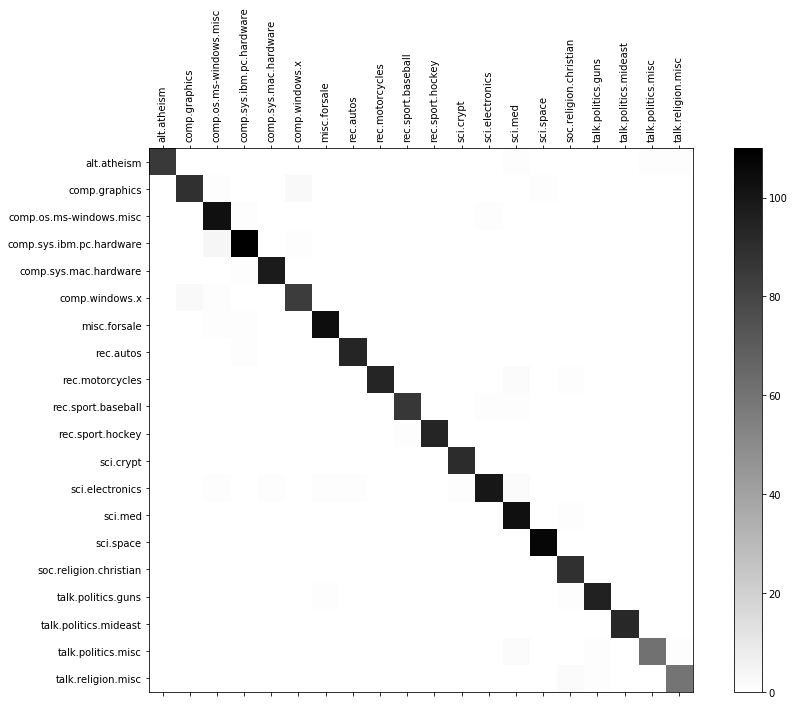

In [241]:
def plot_confusion_matrix(df_confusion):
    '''Helper function to draw confusion matrix'''
    fig, ax = plt.subplots(figsize=(15,10))
    cx = ax.matshow(df_confusion, cmap=plt.cm.gray_r)
    fig.colorbar(cx)
    ax.set_xticks(list(range(len(df_confusion.columns))))
    ax.set_yticks(list(range(len(df_confusion.columns))))
    ax.set_xticklabels(list(df_confusion.columns), rotation=90, minor=False)
    ax.set_yticklabels(list(df_confusion.columns), rotation=0, minor=False)

# Compute the confusion matrix
y_pred = best_model.predict(x_test)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=newsgroups_tr.target_names, columns=newsgroups_tr.target_names)

# Plot the confusion matrix
display(HTML('<center><b>Confusion matrix</b></center>'))
plot_confusion_matrix(conf_matrix)

As expeted, the diagnol values are the highest since the model's accuracy is high.
Some classification mistakes happen due to the confusion between similar topics (e.g. comp.sys.mac.hardware and sci.electronics, comp.os.ms-windows.misc and comp.windows.x)

Text(0,0.5,'Feature')

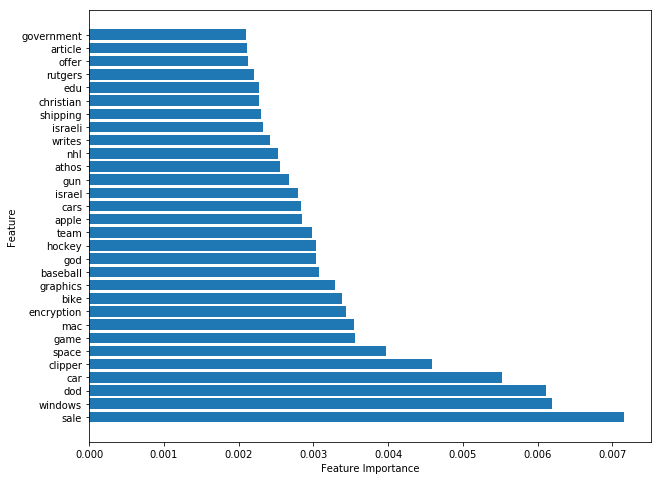

In [242]:
# Plot the most important features according to the model
n = 30
top_features = (-forest.feature_importances_).argsort()[:n]
features_names = vectorizer.get_feature_names()
plt.axes([10,5,1.3,1.5])
plt.barh(range(n), forest.feature_importances_[top_features], align='center')
plt.yticks(np.arange(n), [features_names[i] for i in top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

By looking at the target names and the most important features according to our model, we can conclude that those are represenatative features of theirs topics.
In some cases (e.g. (`gun`, `guns`), (`israel`, `israeli`)), we find words having a similar meaning but treated as two separate features. On one hand, this proves that our model is coherent, however we loose the independence of the features and add computational time.